#### <center>======================================================================================</center>
# <center>**Université Paris 1 Panthéon-Sorbonne**</center>
## <center>Devoir d'Apprentissage Statistique Avancé</center>
### <center>*Présenté par :* </center>
<center>Berthony Sully</center>
<center>Agui Tchabou</center>
<center>Landy Clément</center>
<center>Jerrold Nemba</center>

### <center>Au Professeur : **Alain Célisse** </center>

<center>1er Avril 2022</center>

#### <center>======================================================================================</center>

# Partie 1

1. Prédire la survie des passagers en fonction des autres variables qualitatives descriptives de ces passagers.
Pour cela, vous disposer du fichier "train" pour apprendre la règle de classification, puis du fichier "test" pour évaluer sa  performance de prédiction.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# loading data
train_data = pd.read_csv(r'https://raw.githubusercontent.com/htsull/Adv-Stat-Learn-HW/main/data/train-data.csv')
test_data = pd.read_csv(r'https://raw.githubusercontent.com/htsull/Adv-Stat-Learn-HW/main/data/test-data.csv')
print('train_data.shape:', train_data.shape)
print('test_data.shape:', test_data.shape)

train_data.shape: (712, 25)
test_data.shape: (179, 25)


In [156]:
# data concatenation
data = pd.concat([train_data, test_data], axis=0)
# data shape
print('Full data shape: ', data.shape)

Full data shape:  (891, 25)


In [157]:
# explore data
print('\nData info:')
print(data.info())



Data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 178
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 n

In [158]:
data.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [159]:
# cat = [items for items  in data.columns if items not in ['Age', 'Fare']]
# data = data[cat].apply(lambda x: x.astype('category'))


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 178
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

In [161]:
print('\nData description:')
data.describe().T


Data description:


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Pclass_1,891.0,0.242424,0.428790,0.00,0.0000,0.000000,0.0,1.0000
Pclass_2,891.0,0.206510,0.405028,0.00,0.0000,0.000000,0.0,1.0000
Pclass_3,891.0,0.551066,0.497665,0.00,0.0000,1.000000,1.0,1.0000
Sex_female,891.0,0.352413,0.477990,0.00,0.0000,0.000000,1.0,1.0000
Sex_male,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
SibSp_0,891.0,0.682379,0.465813,0.00,0.0000,1.000000,1.0,1.0000
SibSp_1,891.0,0.234568,0.423966,0.00,0.0000,0.000000,0.0,1.0000


In [162]:
# On supprime les colonnes dont nous n'avons pas besoin 
# col_to_delete = ["SibSp_0", "SibSp_1", "SibSp_2", "SibSp_3", "SibSp_4", "SibSp_5", "SibSp_8",
#                 "Parch_0", "Parch_1", "Parch_2", "Parch_3", "Parch_4", "Parch_5", "Parch_6"]

# data = data.drop(col_to_delete, axis=1)


In [163]:
# drop columns age and fare in train and test data
train_data = train_data.drop(['Age', 'Fare'], axis=1)
# train_data = train_data.drop(col_to_delete, axis=1)
test_data = test_data.drop(['Age', 'Fare'], axis=1)
# test_data = test_data.drop(col_to_delete, axis=1)

In [164]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

X_train = train_data.drop(['Survived'], axis=1)
X_test = test_data.drop(['Survived'], axis=1)
# define target variable
target = 'Survived'

In [165]:
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model_xgb = xgb.fit(X_train, train_data[target])
score_train = model_xgb.score(X_train, train_data[target])
score_test = model_xgb.score(X_test, test_data[target])
print('Score on train data :{:.2f}'.format(score_train))
print('Score on test data :{:.2f}'.format(score_test))

Score on train data :0.82
Score on test data :0.80


Classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       117
           1       0.75      0.65      0.70        62

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Confusion matrix:


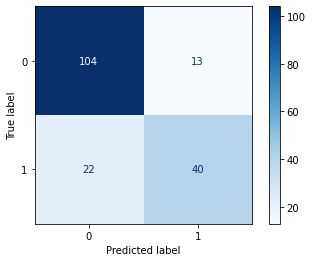

In [166]:
# import plot confusion matrix and classification report
from sklearn.metrics import plot_confusion_matrix, classification_report
print('Classification report:')
print(classification_report(test_data[target], model_xgb.predict(X_test)))
print('Confusion matrix:')
plot_confusion_matrix(model_xgb, X_test, test_data[target], cmap=plt.cm.Blues);

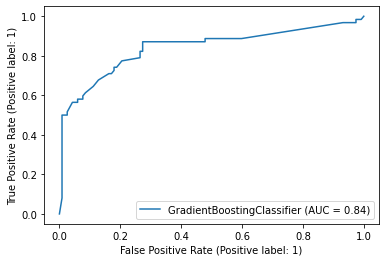

In [167]:
#import plot roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_xgb, X_test, test_data[target]);

# Partie 2

2. Réaliser une réduction de dimension non-supervisée (de type ACM) à partir des données qualitatives en concaténant les deux fichiers fournis (train et test).

In [168]:
from fanalysis.mca import MCA

In [169]:
# On supprime les variables quantitatives 
col_to_delete = ["Age", "Fare", "Survived"]

data2 = data.copy()

data.drop(columns=col_to_delete, inplace=True)

data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [170]:
data = data.astype(int)
data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Notre analyse va porter sur les variables catégorielles suivantes :

In [171]:
var_labels=data.columns
var_labels

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Instanciation de la classe MCA en lui passant des étiquettes pour les variables :

In [172]:
acm = MCA(row_labels=data.index, var_labels=data.columns)

Estimons le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données:

In [173]:
acm.fit(data.values)

MCA(row_labels=Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            169, 170, 171, 172, 173, 174, 175, 176, 177, 178],
           dtype='int64', length=891),
    var_labels=Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object'))

### Analyse des valeurs propres
L'attribut acm.eig\_ contient successivement:

- en 1ère colonne : les valeurs propres en valeur absolue
- en 2ème colonne : les valeurs propres en pourcentage de la variance totale
- en 3ème colonne : les valeurs propres en pourcentage cumulé de la variance totale

##### Nombre de facteurs

In [174]:
#récupération des infos - nombre de variables
p = 5
#nombre d'observations
n = data.shape[0]

#nombre total de modalités
M = data.shape[1]

In [175]:
#nombre max de facteurs
Hmax = M-p
print("le nombre maximum de facteurs est:", Hmax)

le nombre maximum de facteurs est: 17


Affichons les valeurs propres ainsi que les pourcentages d’inertie associées aux facteurs, individuelles et cumulées:

In [176]:
#valeurs propres
print(pd.DataFrame(np.transpose(acm.eig_),columns=['Val. Abs','Val. %','Cumul %']))

        Val. Abs        Val. %     Cumul %
0   1.399841e-01  1.399841e+01   13.998405
1   1.004588e-01  1.004588e+01   24.044282
2   8.826307e-02  8.826307e+00   32.870589
3   7.468726e-02  7.468726e+00   40.339315
4   6.702596e-02  6.702596e+00   47.041910
5   5.669152e-02  5.669152e+00   52.711062
6   5.341955e-02  5.341955e+00   58.053017
7   4.874291e-02  4.874291e+00   62.927308
8   4.582061e-02  4.582061e+00   67.509369
9   4.576222e-02  4.576222e+00   72.085591
10  4.542077e-02  4.542077e+00   76.627669
11  4.518858e-02  4.518858e+00   81.146527
12  4.419738e-02  4.419738e+00   85.566266
13  4.305616e-02  4.305616e+00   89.871881
14  3.898444e-02  3.898444e+00   93.770325
15  3.696772e-02  3.696772e+00   97.467097
16  2.532903e-02  2.532903e+00  100.000000
17  1.378636e-31  1.378636e-29  100.000000
18  9.453854e-32  9.453854e-30  100.000000
19  1.452962e-32  1.452962e-30  100.000000
20  1.047041e-32  1.047041e-30  100.000000
21  7.727144e-33  7.727144e-31  100.000000


Nous voyons que le pourcentage d’inertie totale est expliquée à 100% à partir du 16e axes. Donc, le nombre de facteurs maximum est 16. Représentons graphiquement les valeurs propres (Par défaut : représentation en valeur absolue) pour confirmer le nombre de facteurs

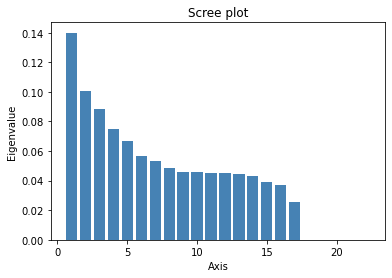

In [177]:
acm.plot_eigenvalues()

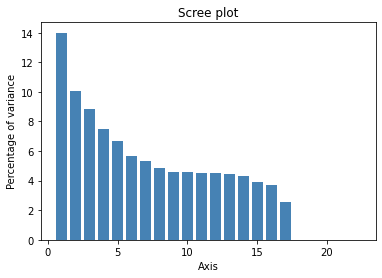

In [178]:
acm.plot_eigenvalues(type="percentage")

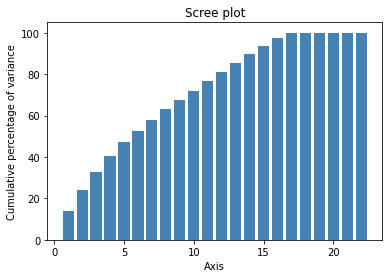

In [179]:
acm.plot_eigenvalues(type="cumulative")

### Extraction des statistiques sur les points lignes

 Export de la totalité des données lignes vers une DataFrame pandas
 
On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points lignes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [180]:
df_rows = acm.row_topandas()
print(df_rows.head())

   row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0       -0.306426       -0.318816       -0.294252       -0.242257   
1        0.049504       -0.038725        0.333656        0.565314   
2        0.296587        0.067278       -0.051408        0.216418   
3       -0.258446       -0.121505        0.299475       -0.108548   
4       -0.391743        0.179505       -0.039579       -0.017802   

   row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
0        0.069985        0.062901       -0.079568       -0.038858   
1       -0.005832        0.163735       -0.081911        0.123279   
2       -0.304380       -0.403303        0.036499       -0.005613   
3        0.212133       -0.062091        0.164697       -0.053202   
4       -0.010479       -0.048901        0.072983       -0.060007   

   row_coord_dim9  row_coord_dim10  ...  row_cos2_dim13  row_cos2_dim14  \
0       -0.048859        -0.011086  ...        0.085100        0.002679   
1       -0.003629   

##### Statistiques pour les points lignes

In [181]:
# Coordonnées des points lignes
print(acm.row_coord_[5:])

[[-2.84113791e-01  1.00633290e-01  4.19959961e-01 ...  7.56565657e-16
  -2.70493293e-17  7.75816771e-16]
 [-2.58446479e-01 -1.21505226e-01  2.99474858e-01 ...  4.95806650e-16
  -7.67922589e-17 -5.81813482e-16]
 [-3.91742624e-01  1.79504779e-01 -3.95790177e-02 ...  2.42987705e-16
  -7.48683271e-16 -1.12104212e-15]
 ...
 [-3.91742624e-01  1.79504779e-01 -3.95790177e-02 ... -2.48846475e-17
  -8.98427768e-18  3.73343756e-17]
 [-3.91742624e-01  1.79504779e-01 -3.95790177e-02 ... -2.48846475e-17
  -8.98427768e-18  3.73343756e-17]
 [-1.73130163e-01 -6.19825784e-01  4.48022400e-02 ... -6.42593239e-17
  -1.90668927e-17  3.72005314e-18]]


In [182]:
# Contributions des points lignes
print(acm.row_contrib_[5:])

[[6.47184888e-02 1.13140424e-02 2.24263723e-01 ... 4.42141541e+00
  7.84280735e-03 8.74221755e+00]
 [5.35531446e-02 1.64939388e-02 1.14041781e-01 ... 1.89885922e+00
  6.32111118e-02 4.91666755e+00]
 [1.23039737e-01 3.59986731e-02 1.99192636e-03 ... 4.56075425e-01
  6.00834416e+00 1.82535418e+01]
 ...
 [1.23039737e-01 3.59986731e-02 1.99192636e-03 ... 4.78333789e-03
  8.65216667e-04 2.02451532e-02]
 [1.23039737e-01 3.59986731e-02 1.99192636e-03 ... 4.78333789e-03
  8.65216667e-04 2.02451532e-02]
 [2.40319611e-02 4.29213861e-01 2.55236459e-03 ... 3.18963051e-02
  3.89689215e-03 2.01002551e-04]]


In [183]:
# Cos2 des points lignes
print(acm.row_cos2_[5:])

[[2.05927316e-01 2.58352499e-02 4.49930155e-01 ... 1.46023440e-30
  1.86656162e-33 1.53549234e-30]
 [1.87277134e-01 4.13936223e-02 2.51457302e-01 ... 6.89236405e-31
  1.65340178e-32 9.49098037e-31]
 [7.29395840e-01 1.53148821e-01 7.44546197e-03 ... 2.80627498e-31
  2.66414516e-30 5.97317843e-30]
 ...
 [7.29395840e-01 1.53148821e-01 7.44546197e-03 ... 2.94323279e-33
  3.83643601e-34 6.62490127e-33]
 [7.29395840e-01 1.53148821e-01 7.44546197e-03 ... 2.94323279e-33
  3.83643601e-34 6.62490127e-33]
 [4.65197836e-02 5.96254251e-01 3.11524113e-03 ... 6.40861991e-33
  5.64224648e-34 2.14778348e-35]]


##### Extraction des statistiques sur les points colonnes

Export de la totalité des données colonnes vers une DataFrame pandas

On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points colonnes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [184]:
df_cols = acm.col_topandas()
print('dimension df_cols:', df_cols.shape)
display(df_cols.head())

dimension df_cols: (44, 66)


,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim13,col_cos2_dim14,col_cos2_dim15,col_cos2_dim16,col_cos2_dim17,col_cos2_dim18,col_cos2_dim19,col_cos2_dim20,col_cos2_dim21,col_cos2_dim22
Pclass_1_0,-0.124716,0.315026,-0.170821,0.137933,-0.216012,0.096838,-0.156606,0.059930,-0.007955,-0.018404,...,0.112695,0.002735,0.003138,0.096241,0.000434,0.000000e+00,7.515856e-32,0.000000e+00,0.000000e+00,0.000000e+00
Pclass_1_1,0.389739,-0.984458,0.533814,-0.431041,0.675036,-0.302620,0.489393,-0.187282,0.024861,0.057513,...,0.112695,0.002735,0.003138,0.096241,0.000434,8.788365e-33,4.808965e-31,4.388572e-32,4.639360e-37,1.117519e-33
Pclass_2_0,-0.062610,-0.051519,-0.308138,-0.138979,0.088734,-0.195456,0.205529,-0.144599,0.006702,0.011733,...,0.052087,0.009252,0.039118,0.008842,0.005345,1.137443e-32,1.777023e-31,1.955027e-31,5.082932e-33,4.987231e-33
Pclass_2_1,0.240573,0.197958,1.183987,0.534011,-0.340950,0.751018,-0.789723,0.555604,-0.025753,-0.045084,...,0.052087,0.009252,0.039118,0.008842,0.005345,1.261118e-32,1.905874e-31,9.241405e-32,3.218618e-34,1.384920e-34
Pclass_3_0,0.321122,-0.440547,0.832894,0.012883,0.207682,0.182054,-0.099000,0.154446,0.001578,0.010319,...,0.010712,0.001104,0.043777,0.036392,0.006000,2.913951e-32,1.865895e-30,6.058372e-34,1.442267e-34,3.948869e-35


##### Statistiques pour les points colonnes

Plus la coordonnée d’une modalité est élevée (en valeur absolue) sur cet axe, plus sa contribution à l’inertie de cet axe est grande :

In [185]:
# Coordonnées des points colonnes
print(acm.col_coord_[5:])

[[-2.61606797e-01  3.58897414e-01 -6.78528549e-01 -1.04952003e-02
  -1.69191412e-01 -1.48312469e-01  8.06516391e-02 -1.25821203e-01
  -1.28587922e-03 -8.40614009e-03  4.87928887e-02 -4.08853705e-02
   9.34168045e-02  2.99876357e-02  1.88848989e-01 -1.72183587e-01
   6.99113285e-02 -2.34046876e-17 -4.42596942e-16  3.43057831e-16
   1.21014980e-17 -5.21330303e-17]
 [-4.83875365e-01  1.71227033e-01  9.93950565e-02 -4.95059882e-01
  -1.39689862e-02  2.87237400e-02 -6.82452544e-02  1.58988158e-02
  -6.92569866e-03 -2.30097226e-03  3.87360992e-02  1.54341214e-02
   3.02807261e-02 -1.67238289e-02 -1.11907815e-01  5.71535932e-02
   3.26733336e-02  1.24003469e-15 -2.36239697e-17 -7.70211947e-17
  -1.03372476e-16  8.81704838e-17]
 [ 8.89159508e-01 -3.14643306e-01 -1.82646330e-01  9.09711949e-01
   2.56691243e-02 -5.27821592e-02  1.25406088e-01 -2.92153398e-02
   1.27265227e-02  4.22821973e-03 -7.11806664e-02 -2.83614270e-02
  -5.56432451e-02  3.07313671e-02  2.05639520e-01 -1.05024278e-01
  -6.0

In [186]:
# Contributions des points colonnes
print(acm.col_contrib_[5:])

[[1.22461788e+00 3.21169230e+00 1.30658695e+01 3.69416302e-03
  1.06978062e+00 9.71892709e-01 3.05005229e-01 8.13537039e-01
  9.03900469e-05 3.86782867e-03 1.31292414e-01 9.26591368e-02
  4.94577742e-01 5.23154864e-02 2.29149645e+00 2.00882420e+00
  4.83345496e-01 9.95261503e-03 5.19025922e+00 2.02890429e+01
  3.50344756e-02 8.81024598e-01]
 [4.92338608e+00 8.59077326e-01 3.29477648e-01 9.65927163e+00
  8.56963240e-03 4.28389967e-02 2.56637505e-01 1.52648850e-02
  3.08135518e-03 3.40557987e-04 9.72417264e-02 1.55170987e-02
  6.10676832e-02 1.91210425e-02 9.45594669e-01 2.60099688e-01
  1.24063429e-01 3.28317098e+01 1.73769001e-02 1.20182631e+00
  3.00414930e+00 2.96143949e+00]
 [9.04711391e+00 1.57862298e+00 6.05441411e-01 1.77496807e+01
  1.57473818e-02 7.87200673e-02 4.71591848e-01 2.80504416e-02
  5.66223548e-03 6.25802415e-04 1.78689414e-01 2.85139043e-02
  1.12216730e-01 3.51364380e-02 1.73760549e+00 4.77953885e-01
  2.27976429e-01 1.17402794e+01 1.59152076e+00 1.68513865e-01
  1.

#### Qualité de la représentation des colonnes
Plus les cos2 sont élevés, plus l’angle entre les points et l’axe est près de zéro et mieux les points sont représentés sur l’axe.

In [187]:
# Cos2 des points colonnes
print(acm.col_cos2_)

[[4.86067990e-02 3.10130128e-01 9.11863940e-02 5.94549228e-02
  1.45815603e-01 2.93052252e-02 7.66419065e-02 1.12238971e-02
  1.97779303e-04 1.05848696e-03 7.07038430e-03 4.06525262e-03
  1.12695299e-01 2.73469689e-03 3.13782351e-03 9.62411993e-02
  4.34202127e-04 0.00000000e+00 7.51585569e-32 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.86067990e-02 3.10130128e-01 9.11863940e-02 5.94549228e-02
  1.45815603e-01 2.93052252e-02 7.66419065e-02 1.12238971e-02
  1.97779303e-04 1.05848696e-03 7.07038430e-03 4.06525262e-03
  1.12695299e-01 2.73469689e-03 3.13782351e-03 9.62411993e-02
  4.34202127e-04 8.78836516e-33 4.80896471e-31 4.38857183e-32
  4.63936036e-37 1.11751916e-33]
 [1.50622953e-02 1.01986521e-02 3.64831679e-01 7.42162899e-02
  3.02538082e-02 1.46790926e-01 1.62310810e-01 8.03396000e-02
  1.72606602e-04 5.28983279e-04 5.10563074e-04 1.40223723e-04
  5.20868677e-02 9.25163038e-03 3.91180291e-02 8.84163596e-03
  5.34539953e-03 1.13744334e-32 1.77702302e-31 1.95502721e-31
  5.

#### Graphiques factoriels

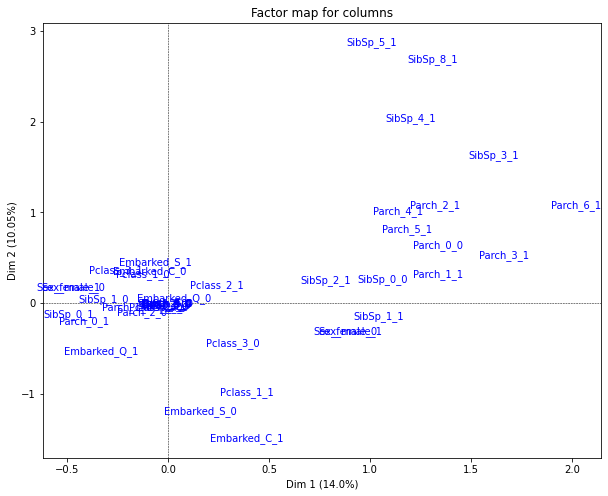

In [188]:
acm.mapping_col(1, 2, short_labels=False, figsize=(10, 8))

Dans le plan factoriel, le centre correspond au profil moyen des deux variables. En général, on s’intéresse davantage aux modalités qui s’éloignent du centre de gravité qu’à celles au centre. Il s’agit aussi des modalités qui contribuent le plus aux axes.

# Partie 3

3. Réaliser une CCA à partir des deux fichiers concaténés en utilisant d'une part comme table X la variable PtClass qui présente 3 modalités (et qui représente le Pont d'embarquement sur le navire), et comme table Y toutes les autres variables qualitatives. L'idée est de trouver de nouveaux axes de représentation qui sont le plus en lien avec le pont d'embarquement (indicateur de classe sociale des passagers)

In [189]:
data2.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [190]:
X = ['Pclass_1', 'Pclass_2', 'Pclass_3']
Y = ['Survived', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
table_X = data2[X]
table_Y = data2[Y]
print('Table X :')
display(table_X.head())
print('Table Y :')
display(table_Y.head())

Table X :


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


Table Y :


,Survived,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [191]:
from sklearn.cross_decomposition import CCA

CCA_ = CCA()
CCA_.fit(table_X, table_Y)
X_c, Y_c = CCA_.transform(table_X, table_Y)

In [192]:
print(X_c.shape)
print(Y_c.shape)

(891, 2)
(891, 2)


In [193]:
results = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       'Survived': data2.Survived.tolist()})
results.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Survived
0,-5.430812e-16,-3.029384e-15,1.623973e-16,-1.243975e-15,0
1,2.545692e-15,-1.182295e-16,-1.447448e-16,6.280735e-16,1
2,-5.430812e-16,1.269549e-15,1.623973e-16,-7.041941e-16,1
3,-7.294656e-16,-1.182295e-16,1.187523e-15,6.280735e-16,0
4,-5.430812e-16,-1.182295e-16,1.623973e-16,6.280735e-16,0


In [194]:
import numpy as np
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.22313519],
       [0.22313519, 1.        ]])

In [195]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[ 1.        , -0.22825849],
       [-0.22825849,  1.        ]])

On voit que les deux premieres axes canoniques ne sont pas tres correlees, de meme aussi pour les deux secondes

Text(0.5, 1.0, 'Comp. 1, corr = 0.22')

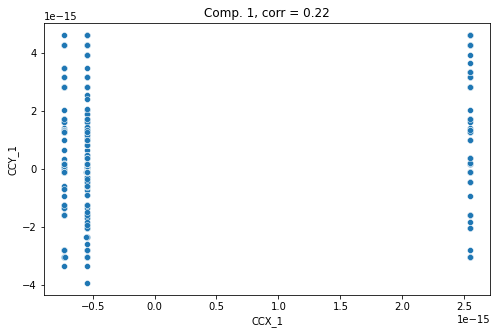

In [196]:
import seaborn as sns

# sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(8,5))
sns.scatterplot(x="CCX_1", y="CCY_1", data=results)
plt.title('Comp. 1, corr = %.2f' % np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.22')

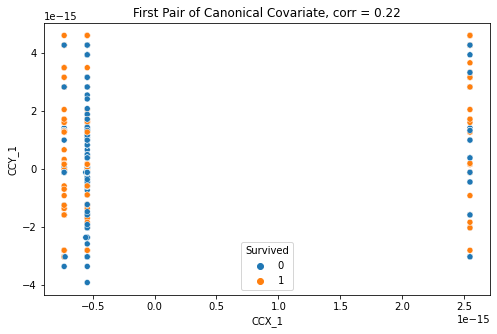

In [198]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                hue="Survived", data=results)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

,CCX_1,CCX_2,Survived
CCX_1,1.000000,-0.563158,0.073603
CCX_2,-0.563158,1.000000,0.232101
Survived,0.073603,0.232101,1.000000


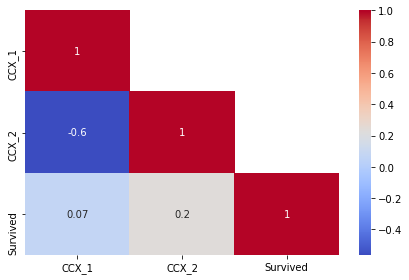

In [202]:
ccX_df = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "Survived":data2.Survived.astype('category').cat.codes})


corr_X_df= ccX_df.corr(method='pearson') 
display(corr_X_df.head())
X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(bool))
sns.heatmap(X_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()

,CCY_1,CCY_2,Survived
CCY_1,1.000000,-0.132399,0.122320
CCY_2,-0.132399,1.000000,-0.398458
Survived,0.122320,-0.398458,1.000000


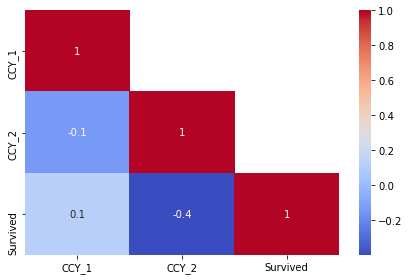

In [204]:
ccY_df = pd.DataFrame({"CCY_1":Y_c[:, 0],
                       "CCY_2":Y_c[:, 1],
                       "Survived":data2.Survived.astype('category').cat.codes})


corr_Y_df= ccY_df.corr(method='pearson') 
display(corr_Y_df.head())
X_df_lt = corr_Y_df.where(np.tril(np.ones(corr_Y_df.shape)).astype(bool))
sns.heatmap(X_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()